In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn   as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# Load the dataset
data =pd.read_csv("diabetes_capstone.csv")

# Display the first few rows and summary of the dataset
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
#Change the name of 'diabetes_012' column to "Diabetes_binary" since it indicates whether a person has diabetes (1) or not (0).
data = data.rename(columns={'Diabetes_012': 'Diabetes_binary'})
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


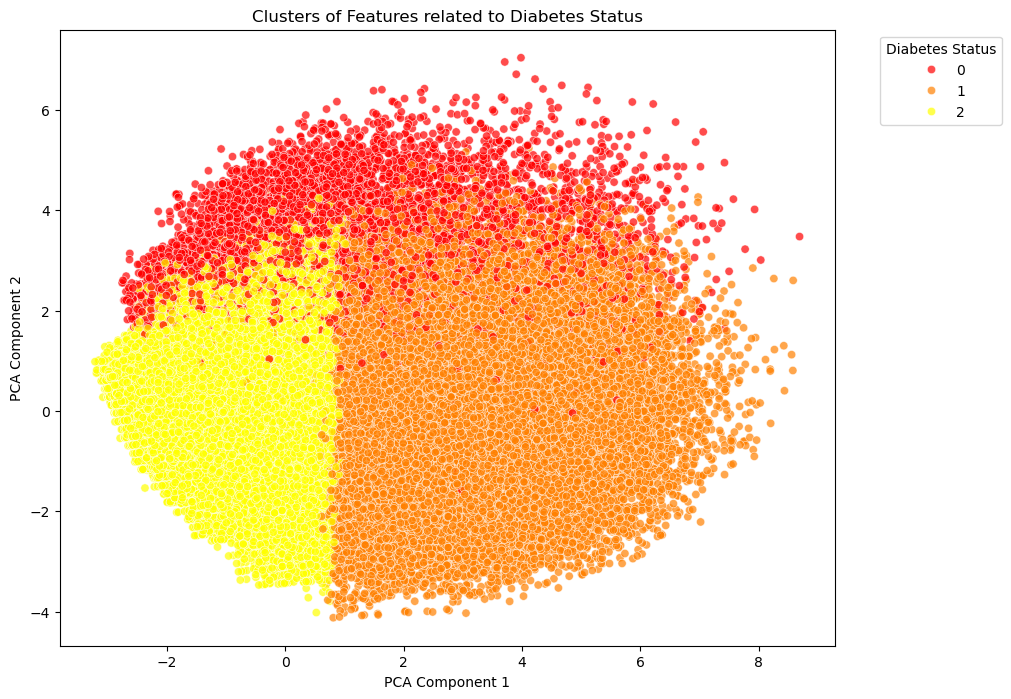

In [4]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
#Combining features to analyse their relation to Diabetes status

# Define the feature groups
risk_factors = ['BMI', 'HighBP', 'HighChol']
medical_complications = ['Stroke', 'HeartDiseaseorAttack']
lifestyle = ['Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost']
health_status = ['GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk']
demographics = ['Sex', 'Age', 'Education', 'Income']

# Combine all features
features = data.select_dtypes(include=['int64', 'float64']).columns
features = risk_factors + medical_complications + lifestyle + health_status + demographics

for feature in features:
    if feature not in data.columns:
        print(f"Column not found: {feature}")
# Preprocess the data
X = data[features]
y = data['Diabetes_binary']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the PCA and cluster results to the dataframe
data['PCA1'] = X_pca[:, 0]
data['PCA2'] = X_pca[:, 1]
data['Cluster'] = clusters

# Plotting the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='autumn', alpha=0.7)
plt.title('Clusters of Features related to Diabetes Status')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Diabetes Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [5]:
data['HealthScore'] = data[['GenHlth', 'MentHlth', 'PhysHlth']].mean(axis=1)
data['HealthScore']

# Bin age into ranges
bins = [0, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, np.inf]
labels = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']
data['Age_binned'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

 # Display the updated DataFrame
data.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,DiffWalk,Sex,Age,Education,Income,PCA1,PCA2,Cluster,HealthScore,Age_binned
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,9.0,4.0,3.0,4.771729,0.478249,1,12.666667,18-24
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,7.0,6.0,1.0,0.791044,4.261159,0,1.000000,18-24
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,9.0,4.0,8.0,4.939801,1.940965,1,21.666667,18-24
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,11.0,3.0,6.0,-0.359240,-0.613002,2,0.666667,18-24
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,11.0,5.0,4.0,-0.177282,-1.278678,2,1.666667,18-24


In [6]:
# Separate the target variable from the features
df_features1 = data.drop("Diabetes_binary",axis=1)
df_target1 = data["Diabetes_binary"]

In [7]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(df_features1, df_target1 , test_size=0.2, random_state=42)


In [8]:
!pip install imbalanced-learn

In [9]:
# Example of replacing age groups with numerical values
df_features1['Age'] = df_features1['Age'].replace({
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65+': 9
})

In [10]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
import pandas as pd

# Create an instance of the SMOTE class with a random state for reproducibility
smote = SMOTE(random_state=42)

# Check the data types of the columns
print(df_features1.dtypes)

# Convert 'Age_binned' to numerical values
df_features1['Age_binned'] = df_features1['Age_binned'].cat.codes

# Check for other categorical columns and convert them
categorical_columns = df_features1.select_dtypes(include=['object', 'category']).columns

# Convert all categorical columns to numerical using one-hot encoding or label encoding
for col in categorical_columns:
    df_features1[col] = pd.factorize(df_features1[col])[0]

# Check the data types again to ensure all are numerical
print(df_features1.dtypes)

# Apply SMOTE to the feature set (df_features1) and target set (df_target1)
df_features1, df_target1 = smote.fit_resample(df_features1, df_target1)

print("Resampling complete. Shape of features:", df_features1.shape)
print("Shape of target:", df_target1.shape)


HighBP                   float64
HighChol                 float64
CholCheck                float64
BMI                      float64
Smoker                   float64
Stroke                   float64
HeartDiseaseorAttack     float64
PhysActivity             float64
Fruits                   float64
Veggies                  float64
HvyAlcoholConsump        float64
AnyHealthcare            float64
NoDocbcCost              float64
GenHlth                  float64
MentHlth                 float64
PhysHlth                 float64
DiffWalk                 float64
Sex                      float64
Age                      float64
Education                float64
Income                   float64
PCA1                     float64
PCA2                     float64
Cluster                    int32
HealthScore              float64
Age_binned              category
dtype: object
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64


In [11]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Assuming 'df_features1' and 'df_target1' are the resampled DataFrames from NearMiss
X = df_features1  # Use the resampled features
y = df_target1    # Use the resampled target

# Initialize the model and RFE with parallel processing
model = LogisticRegression(max_iter=10000, solver='liblinear')
rfe = RFE(model, n_features_to_select=10, step=1, verbose=1)

# Fit the model
rfe.fit(X, y)

# Get the selected features
selected_feature_indices = rfe.support_
selected_features = X.columns[selected_feature_indices]
print("Selected Features:", selected_features)

Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Selected Features: Index(['HighBP', 'CholCheck', 'Stroke', 'HeartDiseaseorAttack',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'DiffWalk', 'Cluster'],
      dtype='object')


In [12]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
# Step 1: Recursive Feature Elimination (RFE)
# Initialize the model and RFE with parallel processing
model = LogisticRegression(max_iter=10000, solver='liblinear')
rfe = RFE(model, n_features_to_select=10, step=1, verbose=1)
rfe.fit(X, y)
rfe_features = X.columns[rfe.support_]
print("Top 10 Features using RFE:", rfe_features.tolist())

# Step 2: Tree-based Methods (Random Forest)
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X, y)
importances = rf_model.feature_importances_
rf_features = pd.Series(importances, index=X.columns)
top_rf_features = rf_features.nlargest(10).index
print("Top 10 Features using RandomForest:", top_rf_features.tolist())

# Step 3: Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X, y)
lasso_features = pd.Series(lasso.coef_, index=X.columns)
top_lasso_features = lasso_features[abs(lasso_features) > 0].nlargest(10).index
print("Top 10 Features using Lasso:", top_lasso_features.tolist())

# Combine high score features
high_score_features = list(set(rfe_features) | set(top_rf_features) | set(top_lasso_features))
print("Combined Top Features:", high_score_features)

Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Top 10 Features using RFE: ['HighBP', 'CholCheck', 'Stroke', 'HeartDiseaseorAttack', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Cluster']
Top 10 Features using RandomForest: ['BMI', 'PCA1', 'GenHlth', 'Age', 'PCA2', 'HighBP', 'HealthScore', 'HighChol', 'Income', 'Education']
Top 10 Features using Lasso: ['GenHlth', 'HighBP', 'HighChol', 'PCA1', 'Age', 'BMI', 'Sex', 'MentHlth', 'PhysHlth'

In [13]:
# Create a new DataFrame with the high score features
df_high_score = X[high_score_features]
df_high_score

,HvyAlcoholConsump,HighChol,MentHlth,PhysHlth,HighBP,HeartDiseaseorAttack,Stroke,Income,NoDocbcCost,HealthScore,...,Cluster,PCA2,AnyHealthcare,PCA1,Age,Sex,CholCheck,Education,BMI,GenHlth
0,0.0,1.000000,18.000000,15.0,1.000000,0.0,0.0,3.000000,0.0,12.666667,...,1,0.478249,1.0,4.771729,9.000000,0.0,1.0,4.000000,40.000000,5.000000
1,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,1.000000,1.0,1.000000,...,0,4.261159,0.0,0.791044,7.000000,0.0,0.0,6.000000,25.000000,3.000000
2,0.0,1.000000,30.000000,30.0,1.000000,0.0,0.0,8.000000,1.0,21.666667,...,1,1.940965,1.0,4.939801,9.000000,0.0,1.0,4.000000,28.000000,5.000000
3,0.0,0.000000,0.000000,0.0,1.000000,0.0,0.0,6.000000,0.0,0.666667,...,2,-0.613002,1.0,-0.359240,11.000000,0.0,1.0,3.000000,27.000000,2.000000
4,0.0,1.000000,3.000000,0.0,1.000000,0.0,0.0,4.000000,0.0,1.666667,...,2,-1.278678,1.0,-0.177282,11.000000,0.0,1.0,5.000000,24.000000,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641104,0.0,1.000000,10.000000,0.0,1.000000,0.0,0.0,1.000000,0.0,4.595644,...,1,0.166515,1.0,2.914121,7.000000,0.0,1.0,3.213068,30.639203,3.786932
641105,0.0,1.000000,3.000000,2.0,1.000000,0.0,0.0,8.000000,0.0,2.666667,...,2,-0.711546,1.0,0.371779,7.630016,0.0,1.0,4.369984,41.260032,3.000000
641106,0.0,0.585931,0.000000,0.0,1.000000,0.0,0.0,8.000000,0.0,1.000000,...,2,-1.627747,1.0,-0.815442,10.000000,1.0,1.0,6.000000,32.000000,3.000000
641107,0.0,1.000000,0.000000,0.0,1.000000,1.0,0.0,5.098236,0.0,0.666667,...,2,-2.644074,1.0,0.770467,11.901764,1.0,1.0,6.000000,31.000000,2.000000


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(df_high_score, df_target1, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

# Display the shapes of the resulting datasets
print(f"Training feature set shape: {X_train.shape}")
print(f"Testing feature set shape: {X_test.shape}")
print(f"Training target set shape: {y_train.shape}")
print(f"Testing target set shape: {y_test.shape}")

Training feature set shape: (512887, 21)
Testing feature set shape: (128222, 21)
Training target set shape: (512887,)
Testing target set shape: (128222,)


In [15]:
## Random Forest- Not Tuned

Training Random Forest...


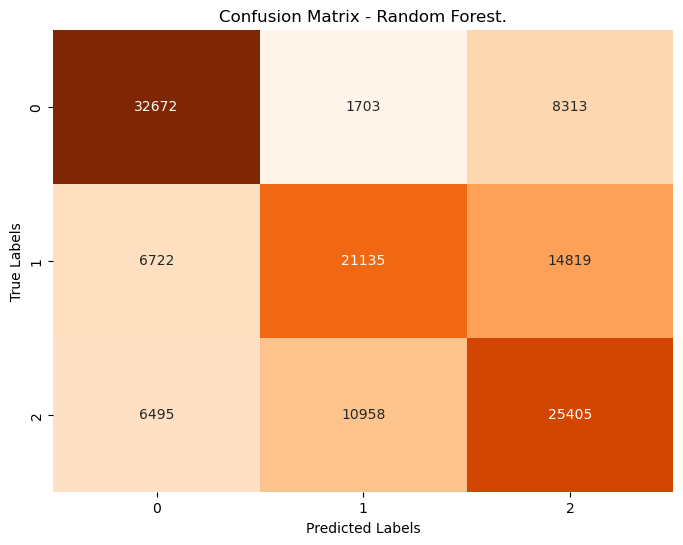

Random Forest - Classification Report:
              precision    recall  f1-score   support

         0.0       0.71      0.77      0.74     42688
         1.0       0.63      0.50      0.55     42676
         2.0       0.52      0.59      0.56     42858

    accuracy                           0.62    128222
   macro avg       0.62      0.62      0.62    128222
weighted avg       0.62      0.62      0.62    128222



In [16]:
print("Training Random Forest...")

# Initialize the model
random_forest = RandomForestClassifier(max_depth=5, n_estimators=1000, class_weight='balanced')

# Fit the model
random_forest.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_random_forest = random_forest.predict(X_test_scaled)

# Evaluate the model
conf_matrix_random_forest = confusion_matrix(y_test, y_pred_random_forest)
class_report_random_forest = classification_report(y_test, y_pred_random_forest)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_random_forest, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest.')
plt.show()

# Print results
print(f"Random Forest - Classification Report:\n{class_report_random_forest}")


In [17]:
## Random Forest- Tuned

In [18]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import randint

print("Training Random Forest...")

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': [None, 5, 10],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False],
    'class_weight': ['balanced', None]
}

# Initialize the model
random_forest = RandomForestClassifier()

# Set up the Randomized Search
random_search = RandomizedSearchCV(estimator=random_forest, param_distributions=param_dist,
                                   n_iter=50, cv=2, n_jobs=-1, verbose=2, scoring='accuracy', random_state=42)

# Fit the model
random_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = random_search.best_params_
print(f"Best parameters found: {best_params}")

# Initialize the model with the best parameters
best_random_forest = RandomForestClassifier(**best_params)

# Fit the model
best_random_forest.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_random_forest = best_random_forest.predict(X_test_scaled)

# Evaluate the model
conf_matrix_random_forest = confusion_matrix(y_test, y_pred_random_forest)
class_report_random_forest = classification_report(y_test, y_pred_random_forest)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_random_forest, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Print results
print(f"Random Forest - Classification Report:\n{class_report_random_forest}")

Training Random Forest...
Fitting 2 folds for each of 50 candidates, totalling 100 fits


In [ ]:
import streamlit as st
import numpy as np
import joblib

# Load your pre-trained model
model = joblib.load('random_forest_model.pkl')

# Define a function to make predictions
def predict_diabetes(inputs):
    input_array = np.array(inputs).reshape(1, -1)
    prediction = model.predict(input_array)
    return prediction[0]

# Streamlit app
st.title("Diabetes Prediction App")
st.write("This app predicts diabetes risk based on user input.")

# Define the questionnaire for input data
HighBP = st.selectbox("Do you have high blood pressure?", (0, 1))
HighChol = st.selectbox("Do you have high cholesterol?", (0, 1))
CholCheck = st.selectbox("Have you had your cholesterol checked?", (0, 1))
BMI = st.slider("What is your BMI?", 10, 50)
Smoker = st.selectbox("Are you a smoker?", (0, 1))
Stroke = st.selectbox("Have you had a stroke?", (0, 1))
HeartDiseaseorAttack = st.selectbox("Have you had heart disease or attack?", (0, 1))
PhysActivity = st.selectbox("Do you engage in physical activity?", (0, 1))
Fruits = st.selectbox("Do you consume fruits regularly?", (0, 1))
Veggies = st.selectbox("Do you consume vegetables regularly?", (0, 1))
HvyAlcoholConsump = st.selectbox("Do you consume heavy amounts of alcohol?", (0, 1))
AnyHealthcare = st.selectbox("Do you have any healthcare coverage?", (0, 1))
NoDocbcCost = st.selectbox("Have you been unable to see a doctor because of cost?", (0, 1))
GenHlth = st.slider("General health (1=Excellent, 5=Poor)", 1, 5)
MentHlth = st.slider("Number of days with poor mental health in the past month", 0, 30)
PhysHlth = st.slider("Number of days with poor physical health in the past month", 0, 30)
DiffWalk = st.selectbox("Do you have difficulty walking?", (0, 1))
Sex = st.selectbox("Sex (0=Female, 1=Male)", (0, 1))
Age = st.slider("Age", 18, 80)
Education = st.slider("Education level (1-6)", 1, 6)
Income = st.slider("Income level (1-8)", 1, 8)

# Collect the input data
input_data = [HighBP, HighChol, CholCheck, BMI, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity,
              Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, GenHlth, MentHlth,
              PhysHlth, DiffWalk, Sex, Age, Education, Income]

# Predict diabetes risk
if st.button("Predict"):
    prediction = predict_diabetes(input_data)
    st.write(f"Prediction: {'Diabetes' if prediction == 1 else 'No Diabetes'}")
